In [27]:
import numpy as np

In [56]:
def n_sigmoid(x):
    return 1 / (1 + (np.exp(-x)))

def n_softmax(x):
    e_x = np.exp(x - np.max(x))  # Subtracting the max value for numerical stability
    return e_x / e_x.sum()

# def n_batch_softmax(x):
#     print('batch soft: ', x)
#     e_x = np.exp(x - np.max(x[:]))  # Subtracting the max value for numerical stability
#     return e_x / e_x.sum()

def n_cross_entropy(predictions, targets):
    return -np.sum(targets * np.log(predictions))

def n_d_cross_entropy(prediction, target):
    return prediction - target

# def n_lin(x, W, b):
#     # y = xW + b
#     return np.dot(x, W) + b

# def n_d_lin(x, y_grad, W):
#     # y = xW + b
    
#     # d_x = d_y * W
#     d_x = np.dot(y_grad, W.T)
    
#     # d_W = d_y * x
#     d_W = (x.unsqueeze(-1) * y_grad.unsqueeze(1)).sum(0)
    
#     # d_b = d_y
#     d_b = y_grad.sum(0)
    
#     return d_x, d_W, d_b

def n_d_sigmoid(x):
    s = n_sigmoid(x)
    return s * (1 - s)

def n_d_cross_entropy(prediction, target):
    return prediction - target

def n_d_softmax(softmax_output):
    # Simplified version for our case
    return softmax_output * (1 - softmax_output)
    

In [164]:
lr = 1e-3
x = np.array([1, -1])
t = np.array([1, 0])

num_of_input = 2
size_layer_1 = 3
size_layer_2 = 2

# import pdb; pdb.set_trace()
# import pdb; pdb.set_trace()

## forward ##

# layer 1
W = np.array([[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]])
b = np.zeros(size_layer_1)

# linear layer : k = x * W + b
k = np.dot(x, W) + b
assert k.shape[0] == 3
print('K', k)

# non-linearity : sigmoid : h = sigmoid(k)
h = n_sigmoid(k)
assert h.shape[0] == 3
print('H', h)

# layer 2
# V = np.zeros(( h.shape[0], size_layer_2))
V = np.array([[1.0, 1.0], [-1.0, -1.0], [-1.0, -1.0]])
c = np.zeros(size_layer_2)

# linear layer : o = h * V + c
o = np.dot(h, V) + c
assert o.shape[0] == size_layer_2
print('O', o)

# non-linearity : softmax : y = softmax(o)
y = n_softmax(o)
assert y.shape[0] == size_layer_2
print('Y', y)

# loss : cross entropy
l = n_cross_entropy(y, t)
print('L', l)


## backward ##

# deriv of ce : dl_dy

# layer 1
# deriv of softmax : dy_do

# deriv of dl_do
do = y - t
print('DO', do)


# deriv of lin wrt V : dV = do * h
dV = np.matmul(h.reshape(h.shape[0], 1), do.reshape(1, do.shape[0]))
assert dV.shape[0] == h.shape[0]
assert dV.shape[1] == do.shape[0]
print('DV', dV)


# deriv of lin wrt h #  : dh = do * V
dh = (do[None, :] * V).sum(axis=1)
assert dh.shape[0] == size_layer_1
print('DH', dh)

# deriv of lin wrt c : dc = do
dc = do.copy()
print('DC', dc)

# layer 2

# deriv of sigmoid : dk = dh * n_d_sigmoid
dk = dh * n_d_sigmoid(k)
print('DK', dk)
assert dk.shape[0] == size_layer_1

# deriv of lin wrt W : dW = dk * x
dW = np.matmul(x.reshape(x.shape[0], 1), dk.reshape(1, dk.shape[0]))
print('DW', dW)
assert dV.shape[0] == dk.shape[0]
assert dV.shape[1] == x.shape[0]

# deriv of lin wrt b : db = dk
db = dk.copy()
print('DB', db)

# deriv of lin wrt x # np.dot(dk, W.T) : dx
dx = (dk[None, :] * W).sum(axis=1)
print('DX', dx)
assert dx.shape[0] == 2


## sgd ##

# update W : W = -lr * dW
print('OLD W', W, dW)
W = W + -lr * dW
print('NEW W', W, dW)

# update b : b = -lr * db
print('OLD b', b, db)
b = b + -lr * db
print('NEW b', b, db)

# update V : V = -lr * dV
print('OLD V', V, dV)
V = V + -lr * dV
print('NEW V', V, dV)

# update c : b = -lr * dc
print('OLD c', c, dc)
c = c + -lr * dc
print('NEW c', c, dc)

K [2. 2. 2.]
H [0.88079708 0.88079708 0.88079708]
O [-0.88079708 -0.88079708]
Y [0.5 0.5]
L 0.6931471805599453
DO [-0.5  0.5]
DV [[-0.44039854  0.44039854]
 [-0.44039854  0.44039854]
 [-0.44039854  0.44039854]]
DH [0. 0. 0.]
DC [-0.5  0.5]
DK [0. 0. 0.]
DW [[0. 0. 0.]
 [0. 0. 0.]]
DB [0. 0. 0.]
DX [0. 0.]
OLD W [[ 1.  1.  1.]
 [-1. -1. -1.]] [[0. 0. 0.]
 [0. 0. 0.]]
NEW W [[ 1.  1.  1.]
 [-1. -1. -1.]] [[0. 0. 0.]
 [0. 0. 0.]]
OLD b [0. 0. 0.] [0. 0. 0.]
NEW b [0. 0. 0.] [0. 0. 0.]
OLD V [[ 1.  1.]
 [-1. -1.]
 [-1. -1.]] [[-0.44039854  0.44039854]
 [-0.44039854  0.44039854]
 [-0.44039854  0.44039854]]
NEW V [[ 1.0004404  0.9995596]
 [-0.9995596 -1.0004404]
 [-0.9995596 -1.0004404]] [[-0.44039854  0.44039854]
 [-0.44039854  0.44039854]
 [-0.44039854  0.44039854]]
OLD c [0. 0.] [-0.5  0.5]
NEW c [ 0.0005 -0.0005] [-0.5  0.5]


In [56]:
# (h * W).sum()
t_h = np.array([0.5, 0.5])
t_dl = np.array([-0.5,  0.5])

# Reshape the matrices to enable multiplication
# t_h needs to be a 2D array of shape (1, 3)
# t_dl needs to be a 2D array of shape (2, 1)
# t_h_reshaped = t_h.reshape(3, 1)
# t_dl_reshaped = t_dl.reshape(1, 2)

# Multiply the matrices
result = (t_dl[None, :] * t_h).sum(axis=1)

result

# dl = h.reshape(1, h.shape[0])
# dV = np.matmul(dl, h.T)
# print(dV)

# dl = n_d_cross_entropy(y, t)
# assert dl.shape[0] == 2
# print('DL', dl)



array([0.])

In [116]:
# output
np.array([[-0.44039853898894116, 0.44039853898894116],
   [-0.44039853898894116, 0.44039853898894116],
   [-0.44039853898894116, 0.44039853898894116]]).shape

h = np.array([0.888, 0.888, 0.888])
do = np.array([-0.5, 0.5])
print(h, h.shape, do, do.shape)


[0.888 0.888 0.888] (3,) [-0.5  0.5] (2,)


In [135]:
# h shape = (3, ) -> (3, 1)
# do shape = (2, ) -> (1, 2)
# goal shape = (3, 2)
dv = np.matmul(h.reshape(h.shape[0], 1), do.reshape(1, do.shape[0]))

# Above is working don't mess with it!

In [28]:
def lin(input, weight, bias):
    return np.dot(input, weight) + bias

In [29]:
def lin_grad(lin_input, output_grad, weights):
    dW = np.matmul(lin_input.reshape(lin_input.shape[0], 1), output_grad.reshape(1, output_grad.shape[0]))
    dx = (output_grad[None, :] * weights).sum(axis=1)
    db = output_grad.copy()
    return dW, dx, db

In [172]:
lr = 1e-3

x = np.array([1, -1])
t = np.array([1, 0])

num_of_input = 2
size_layer_1 = 3
size_layer_2 = 2

W = np.array([[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]])
b = np.zeros(size_layer_1)

V = np.array([[1.0, 1.0], [-1.0, -1.0], [-1.0, -1.0]]) # V = np.zeros(( h.shape[0], size_layer_2))
c = np.zeros(size_layer_2)

# import pdb; pdb.set_trace()

## forward ##

# layer 1

# linear layer : k = x * W + b
k = lin(x, W, b)
assert k.shape[0] == 3
print('K', k)

# non-linearity : sigmoid : h = sigmoid(k)
h = n_sigmoid(k)
assert h.shape[0] == 3
print('H', h)

# layer 2

# linear layer : o = h * V + c
o = lin(h, V, c)
assert o.shape[0] == size_layer_2
print('O', o)

# non-linearity : softmax : y = softmax(o)
y = n_softmax(o)
assert y.shape[0] == size_layer_2
print('Y', y)

# loss : cross entropy
l = n_cross_entropy(y, t)
print('L', l)


## backward ##

# deriv of ce : dl_dy

# layer 1
# deriv of softmax : dy_do

# deriv of dl_do
do = y - t
print('DO', do)


# deriv of lin wrt V : dV = do * h
dV, dh, dc = lin_grad(h, do, V)

# dV = np.matmul(h.reshape(h.shape[0], 1), do.reshape(1, do.shape[0]))
# assert dV.shape[0] == h.shape[0]
# assert dV.shape[1] == do.shape[0]
print('DV', dV)


# # deriv of lin wrt h #  : dh = do * V
# dh = (do[None, :] * V).sum(axis=1)
# assert dh.shape[0] == size_layer_1
print('DH', dh)

# # deriv of lin wrt c : dc = do
# dc = do.copy()
print('DC', dc)

# layer 2

# deriv of sigmoid : dk = dh * n_d_sigmoid
dk = dh * n_d_sigmoid(k)
print('DK', dk)
assert dk.shape[0] == size_layer_1

# deriv of lin wrt W : dW = dk * x
dW, dx, db = lin_grad(x, dk, W)

# dW = np.matmul(x.reshape(x.shape[0], 1), dk.reshape(1, dk.shape[0]))
print('DW', dW)
# assert dV.shape[0] == dk.shape[0]
# assert dV.shape[1] == x.shape[0]

# # deriv of lin wrt b : db = dk
# db = dk.copy()
print('DB', db)

# # deriv of lin wrt x # np.dot(dk, W.T) : dx
# dx = (dk[None, :] * W).sum(axis=1)
print('DX', dx)
# assert dx.shape[0] == 2


## sgd ##

# update W : W = -lr * dW
print('OLD W', W, dW)
W = W + -lr * dW
print('NEW W', W, dW)

# update b : b = -lr * db
print('OLD b', b, db)
b = b + -lr * db
print('NEW b', b, db)

# update V : V = -lr * dV
print('OLD V', V, dV)
V = V + -lr * dV
print('NEW V', V, dV)

# update c : b = -lr * dc
print('OLD c', c, dc)
c = c + -lr * dc
print('NEW c', c, dc)

K [2. 2. 2.]
H [0.88079708 0.88079708 0.88079708]
O [-0.88079708 -0.88079708]
Y [0.5 0.5]
L 0.6931471805599453
DO [-0.5  0.5]
DV [[-0.44039854  0.44039854]
 [-0.44039854  0.44039854]
 [-0.44039854  0.44039854]]
DH [0. 0. 0.]
DC [-0.5  0.5]
DK [0. 0. 0.]
DW [[0. 0. 0.]
 [0. 0. 0.]]
DB [0. 0. 0.]
DX [0. 0.]
OLD W [[ 1.  1.  1.]
 [-1. -1. -1.]] [[0. 0. 0.]
 [0. 0. 0.]]
NEW W [[ 1.  1.  1.]
 [-1. -1. -1.]] [[0. 0. 0.]
 [0. 0. 0.]]
OLD b [0. 0. 0.] [0. 0. 0.]
NEW b [0. 0. 0.] [0. 0. 0.]
OLD V [[ 1.  1.]
 [-1. -1.]
 [-1. -1.]] [[-0.44039854  0.44039854]
 [-0.44039854  0.44039854]
 [-0.44039854  0.44039854]]
NEW V [[ 1.0004404  0.9995596]
 [-0.9995596 -1.0004404]
 [-0.9995596 -1.0004404]] [[-0.44039854  0.44039854]
 [-0.44039854  0.44039854]
 [-0.44039854  0.44039854]]
OLD c [0. 0.] [-0.5  0.5]
NEW c [ 0.0005 -0.0005] [-0.5  0.5]


In [ ]:
# print('ACC W', W, a_dW)
# print('ACC b', b, a_db)
# print('ACC V', V, a_dV)
# print('ACC c', c, a_dc)
    
# x = np.array([1, -1])
# t = np.array([1, 0])
# np.array([[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]]) # num_of_input x size_layer_1
# np.array([[1.0, 1.0], [-1.0, -1.0], [-1.0, -1.0]]) # size_layer_1 x size_layer_2

In [24]:
from data import load_synth
(xtrain, ytrain), (xval, yval), num_cls = load_synth()

def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = arr.max() - arr.min()    
    for i in arr:
        temp = (((i - arr.min())*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

def target_arr(num_cls, t):
    arr = [0] * num_cls
    arr[t] = 1
    return arr


norm_train_x = normalize(xtrain, 0, 1)
norm_val_x = normalize(xval, 0, 1)

norm_train_y = normalize(ytrain, 0, 1)
norm_val_y = normalize(yval, 0, 1)

In [30]:
import matplotlib.pyplot as plt

def plot_losses(loss_train):
    epochs = range(0,len(loss_train))
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.title('Training loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

Done epoch : 1
Done epoch : 2
Done epoch : 3
Done epoch : 4
Done epoch : 5


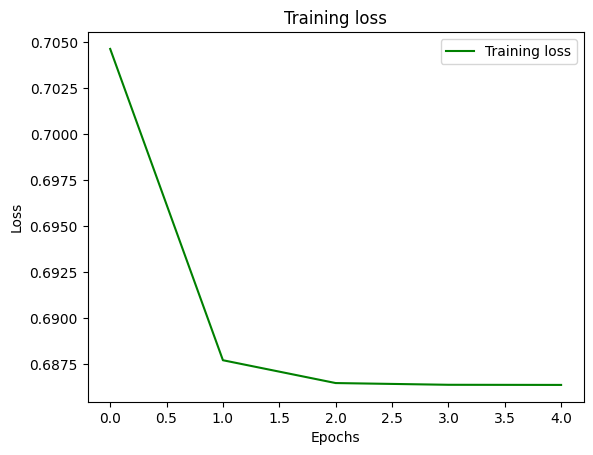

In [36]:
lr = 1e-5

num_of_input = 2
size_layer_1 = 3
size_layer_2 = 2

W = np.random.randn(num_of_input, size_layer_1) 
b = np.zeros(size_layer_1)

V = np.random.randn(size_layer_1, size_layer_2) 
c = np.zeros(size_layer_2)

len_train = len(norm_train_x)

epoch = 5
losses = []

for e in range(epoch):
    a_dW = np.zeros((num_of_input, size_layer_1))
    a_dV = np.zeros((size_layer_1, size_layer_2))
    a_db = np.zeros(size_layer_1)
    a_dc = np.zeros(size_layer_2)
    
    loss = []
    
    for i in range(len_train):
        in1, in2 = norm_train_x[i]
        out = 0 if norm_train_y[i] == 1 else 1 
        t = np.array(target_arr(num_cls, out))
        x = np.array([in1, in2])
        
        k = lin(x, W, b)
        h = n_sigmoid(k)
        o = lin(h, V, c)
        y = n_softmax(o)
        
        l = n_cross_entropy(y, t)
        loss.append(l)
        
        do = y - t
        dV, dh, dc = lin_grad(h, do, V)
        dk = dh * n_d_sigmoid(k)
        dW, dx, db = lin_grad(x, dk, W)
        
        # accumulate gradients
        a_dW += dW
        a_dV += dV
        a_db += db
        a_dc += dc
    
    # sgd
    W = W + -lr * a_dW
    b = b + -lr * a_db
    V = V + -lr * a_dV
    c = c + -lr * a_dc
    
    losses.append(np.mean(loss))
    
    print(f'Done epoch : {e+1}')
    
    
plot_losses(losses)
    

# THE ABOVE WORKS DON'T FUCK WITH IT!!!

In [1]:
import mnist

In [ ]:
mnist.init()

In [101]:
m_x_train, m_t_train, m_x_test, m_t_test = mnist.load()

In [102]:
m_x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [96]:
# note : normalize the test set wrt to the training set (frm class)
def n_normalize(v, ma, mi):
    norm = (v - mi) / (ma - mi)
    return norm

In [105]:
ma = m_x_train.max()
mi = m_x_train.min()

m_x_train_normize = n_normalize(m_x_train, ma, mi)

In [137]:
m_x_train_normize[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [115]:
m_x_train_normize.shape

(60000, 784)

In [111]:
m_t_train.shape

(60000,)

In [146]:
r_t_train = m_t_train.reshape((m_t_train.shape[0],1))

In [136]:
r_t_train[1][0]

0

In [30]:
np.array(norm_train_x).shape

(60000, 2)

In [127]:
def one_hot(i, size):
    oh = np.zeros(size)
    oh[i] = 1
    return oh

In [129]:
one_hot(9, 10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [126]:
m_t_test.max()

9

In [171]:
def n_one_hot(arr):
    new_arr = np.zeros((arr.size, arr.max() + 1))
    new_arr[np.arange(arr.size), arr] = 1
    return new_arr

In [175]:
m_t_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [180]:
m_t_train_one_hot = n_one_hot(np.array(m_t_train))

In [181]:
m_t_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Done epoch : 1
Done epoch : 2
Done epoch : 3
Done epoch : 4
Done epoch : 5
Done epoch : 6
Done epoch : 7
Done epoch : 8
Done epoch : 9
Done epoch : 10
Done epoch : 11
Done epoch : 12
Done epoch : 13
Done epoch : 14
Done epoch : 15
Done epoch : 16
Done epoch : 17
Done epoch : 18
Done epoch : 19
Done epoch : 20
Done epoch : 21
Done epoch : 22
Done epoch : 23
Done epoch : 24
Done epoch : 25


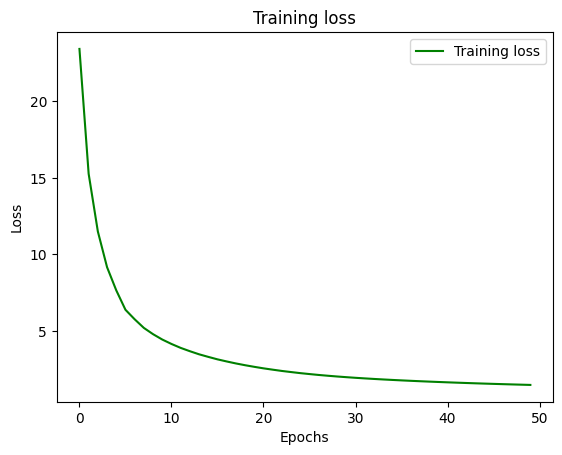

In [186]:
lr = 1e-5

num_of_input = 784
size_layer_1 = 300
size_layer_2 = 10

W = np.random.randn(num_of_input, size_layer_1) 
b = np.zeros(size_layer_1)

V = np.random.randn(size_layer_1, size_layer_2) 
c = np.zeros(size_layer_2)

len_train =  len(m_x_train_normize)

epoch = 5
losses = []

for e in range(epoch):
    a_dW = np.zeros((num_of_input, size_layer_1))
    a_dV = np.zeros((size_layer_1, size_layer_2))
    a_db = np.zeros(size_layer_1)
    a_dc = np.zeros(size_layer_2)
    
    loss = []
    
    for i in range(len_train):
        
        t = m_t_train_one_hot[i]
        x = m_x_train_normize[i]
        
        k = lin(x, W, b)
        h = n_sigmoid(k)
        o = lin(h, V, c)
        y = n_softmax(o)
        
        l = n_cross_entropy(y, t)
        loss.append(l)
        
        do = y - t
        dV, dh, dc = lin_grad(h, do, V)
        dk = dh * n_d_sigmoid(k)
        dW, dx, db = lin_grad(x, dk, W)
        
        # accumulate gradients
        a_dW += dW
        a_dV += dV
        a_db += db
        a_dc += dc
    
    # sgd
    W = W + -lr * a_dW
    b = b + -lr * a_db
    V = V + -lr * a_dV
    c = c + -lr * a_dc
    
    losses.append(np.mean(loss))
    
    print(f'Done epoch : {e+1}')
    
    
plot_losses(losses)

In [82]:
x = np.array([[1,2,3,4], [1,1,2,2]])
x = x - x.min() / x.max() - x.min()

In [187]:
# prev : Accuracy: 62.53999999999999%
# m_x_test, m_t_test
r_t_test = m_t_test.reshape((m_t_test.shape[0], 1))
m_x_test_normize = n_normalize(m_x_test, ma, mi)

len_test =  len(m_x_test_normize)
correct = 0

for i in range(len_test):
    t = one_hot(r_t_test[i][0], 10)
    x = m_x_test_normize[i]

    k = lin(x, W, b)
    h = n_sigmoid(k)
    o = lin(h, V, c)
    y = n_softmax(o)
    
    if y.argmax() == t.argmax():
        correct += 1

print(f'Accuracy: {(correct/len_test) * 100}%')

Accuracy: 73.36%


In [159]:
m_x_test_normize.shape

(10000, 784)

In [189]:
for i in range(len(losses)):
    print(f'{i+1} : {losses[i]}')

1 : 23.41892834445657
2 : 15.26481259557831
3 : 11.499017721377468
4 : 9.168744948511744
5 : 7.657981550886265
6 : 6.387708364200997
7 : 5.766637120398863
8 : 5.203074036361378
9 : 4.793977704103455
10 : 4.444615386950347
11 : 4.155789929157928
12 : 3.898710559198028
13 : 3.6823255820888305
14 : 3.480773736457431
15 : 3.3117539926467168
16 : 3.150764914343692
17 : 3.013151528173476
18 : 2.883631554310251
19 : 2.767804765481984
20 : 2.662440481313806
21 : 2.563764212463361
22 : 2.4768739508283737
23 : 2.393438768915411
24 : 2.3208459983878935
25 : 2.2510615014429196
26 : 2.189950033568405
27 : 2.131773715502014
28 : 2.080041504141709
29 : 2.0312608410390007
30 : 1.9871119860020812
31 : 1.9456841623052794
32 : 1.907566316002259
33 : 1.871795893960282
34 : 1.8384397087535707
35 : 1.8070236219932145
36 : 1.7774362129729544
37 : 1.7494274199230784
38 : 1.722863607141537
39 : 1.697595398279068
40 : 1.6735127001979972
41 : 1.650514881974411
42 : 1.6285177632982513
43 : 1.6074471601603113
44 :

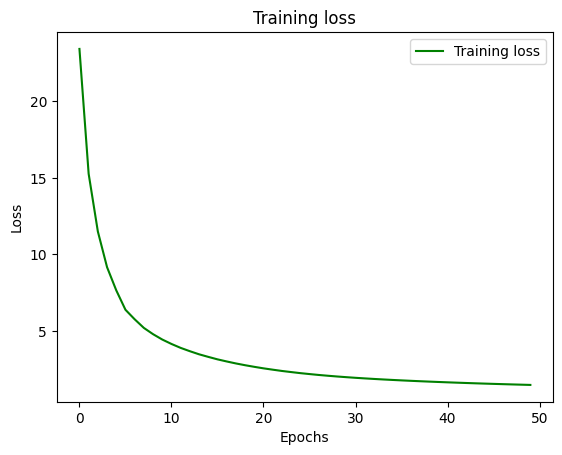

In [191]:
plot_losses(losses)

In [198]:
np.sum(np.array([np.log(0), np.log(0.1)]))

/var/folders/g0/hpf9tcbs1rvg96xzgbm2_9p40000gn/T/ipykernel_66906/2771041298.py:1: RuntimeWarning: divide by zero encountered in log
  np.sum(np.array([np.log(0), np.log(0.1)]))


-inf

In [ ]:
# split training set to training & validation
# np.random.seed(0)
# validation_ratio = 0.2

# num_validation_samples = int(validation_ratio * x_train.shape[0])

# indices = np.arange(x_train.shape[0])
# np.random.shuffle(indices)

# # training set
# m_x_train = x_train[indices[num_validation_samples:]]
# m_t_train = t_train[indices[num_validation_samples:]]

# # validation set
# m_x_val = x_train[indices[:num_validation_samples]]
# m_t_val = t_train[indices[:num_validation_samples]]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for 'losses' (replace this with your actual data)
losses = [16.55447129, 11.92144349,  9.42792768,  7.77098417,  6.71618185]

ls = np.array(losses)
mean = np.mean(ls)
std_d = np.std(ls)
t = np.arange(len(ls))  # Use np.arange to create an array of indices

lower_bound = mean - std_d * np.sqrt(t)
upper_bound = mean + std_d * np.sqrt(t)

fig, ax = plt.subplots(1)
ax.plot(t, ls, lw=2, label='actual loss', color='blue')
ax.plot(t, mean * np.ones_like(t), lw=1, label='mean', color='black', ls='--')
ax.fill_between(t, lower_bound, upper_bound, facecolor='yellow', alpha=0.5, label='std range')

# Use 'where' argument to fill the region where the losses are above the upper_bound
ax.fill_between(t, upper_bound, ls, where=ls > upper_bound, facecolor='blue', alpha=0.5)

ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.grid()
ax.legend(loc='upper left')
plt.show()

fig, ax = plt.subplots(1)
ax.plot(t, ls, lw=2, label='actual loss', color='blue')
ax.plot(t, mean * np.ones_like(t), lw=1, label='mean', color='black', ls='--')
ax.fill_between(t, lower_bound, upper_bound, facecolor='yellow', alpha=0.5, label='std range')

# Use 'where' argument to fill the region where the losses are above the upper_bound
ax.fill_between(t, upper_bound, ls, where=ls > upper_bound, facecolor='blue', alpha=0.5)

ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.grid()
ax.legend(loc='upper left')
plt.show()

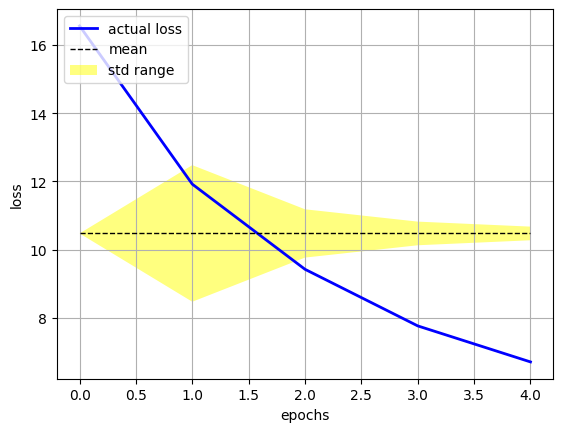

In [2]:
ls = np.array(losses)
mean = np.mean(ls)
std_d = np.array([1, 2,  0.5,  0.2,  0.1])
t = np.arange(len(ls))  # Use np.arange to create an array of indices

lower_bound = mean - std_d * np.sqrt(t)
upper_bound = mean + std_d * np.sqrt(t)

fig, ax = plt.subplots(1)
ax.plot(t, ls, lw=2, label='actual loss', color='blue')
ax.plot(t, mean * np.ones_like(t), lw=1, label='mean', color='black', ls='--')
ax.fill_between(t, lower_bound, upper_bound, facecolor='yellow', alpha=0.5, label='std range')

# Use 'where' argument to fill the region where the losses are above the upper_bound
ax.fill_between(t, upper_bound, ls, where=ls > upper_bound, facecolor='blue', alpha=0.5)

ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.grid()
ax.legend(loc='upper left')
plt.show()import numpy as np
import matplotlib.pyplot as plt

# Sample data for 'losses' (replace this with your actual data)
losses = [16.55447129, 11.92144349,  9.42792768,  7.77098417,  6.71618185]



In [3]:
a = np.arange(2 * 2 * 4).reshape((2, 2, 4))
b = np.arange(2 * 2 * 4).reshape((2, 4, 2))
a.shape, b.shape


((2, 2, 4), (2, 4, 2))

In [4]:
a, b

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],
 
        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]),
 array([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],
 
        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]]]))

In [5]:
np.matmul(a,b).shape

(2, 2, 2)

In [8]:
from data import load_synth
(x_train, t_train), (x_val, t_val), num_cls = load_synth()

In [6]:
def lin(input, weight, bias):
    return np.dot(input, weight) + bias

In [19]:
t = x_train[:5]
t

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ]])

In [22]:
# batch
batch = 2
# lin
# in for loop
i = 0
b = t[i:batch]
i += batch

b


array([[1.76405235, 0.40015721],
       [0.97873798, 2.2408932 ]])

In [44]:
def n_one_hot(arr):
    new_arr = np.zeros((arr.size, arr.max() + 1))
    new_arr[np.arange(arr.size), arr] = 1
    return new_arr

def n_normalize(v, ma, mi): 
    norm = (v - mi) / (ma - mi)
    return norm

ma = x_train.max()
mi = x_train.min()
x_train_normize = n_normalize(x_train, ma, mi)
t_train_one_hot = n_one_hot(np.array(t_train))

In [193]:
# If you are considering each array within your batch as a separate input, 
# then you'll need to apply softmax across axis 1 (columns).
# axis=1 ensures that the softmax is applied to each row 
# (i.e., each set of inputs in your batch) independently.
# keepdims=True keeps the output shape compatible with the input shape, 
# which is important for maintaining the structure of your data, especially 
# when dealing with batches.
def n_batch_softmax(x):
    # print('batch soft: ', x)
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / e_x.sum(axis=1, keepdims=True)

In [71]:
testing = np.array([[-0.88079708, -0.88079708],[-0.88079708, -0.88079708]])
n_batch_softmax(testing)

batch soft:  [[-0.88079708 -0.88079708]
 [-0.88079708 -0.88079708]]


array([[0.5, 0.5],
       [0.5, 0.5]])

In [204]:
def n_batch_cross_entropy(predictions, targets):
    
    log_pred = np.log(predictions)
    # print(f'LOG PRED: {log_pred}')
    reshaped_p = log_pred[np.newaxis, :]
    reshaped_t = targets[:,np.newaxis]
    print('BATCH CE', reshaped_p.shape, reshaped_t.shape)
    return -(np.matmul(reshaped_t, reshaped_p[:,None]).squeeze(-1).sum(axis=0))

In [128]:
p = np.array(
    [[0.5, 0.5],
 [0.5, 0.5]]
)
t = np.array(
    [[ 1, -1],
 [ 1, -1]]
)
n_batch_cross_entropy(p, t)

BATCH CE [[0.5 0.5]
 [0.5 0.5]] [[ 1 -1]
 [ 1 -1]]
LOG PRED: [[-0.69314718 -0.69314718]
 [-0.69314718 -0.69314718]]


array([[-0.],
       [-0.]])

In [191]:
def batch_lin_grad(lin_input, output_grad, weights):
    dW = np.matmul(lin_input[:, :, np.newaxis], output_grad[:, np.newaxis, :]).sum(axis=0)

    dx = np.matmul(output_grad, weights.T).sum(axis=0)
    db = output_grad.sum(axis=0)
    return dW, dx, db


    # print(weights.ndim)
    # t_weights = weights.T if weights.ndim == 2 else weights
    # if weights.shape[0] == lin_input.shape[1]:  # Case where weights are (num_features, num_outputs)
    #     reshaped_weights = weights.T
    # elif weights.shape[1] == lin_input.shape[1]:  # Case where weights are (num_outputs, num_features)
    #     reshaped_weights = weights
        
# dx = (output_grad[None, :] * weights.T).sum(axis=1, keepdims=True)
# print('batching...', lin_input, output_grad, weights)
    # print('DW', dW)
# if weights.ndim == 2:
#     weights = weights[:, np.newaxis, :]

# if weights.ndim == 2:
#     reshaped_weights = weights.T
# dx = np.matmul(output_grad, weights, axis=1, keepdims=True)

# dx = np.matmul(output_grad[:, :, np.newaxis], weights).sum(axis=1)
# print('dW shape: ', dW)

# print(output_grad.shape, weights.shape)

In [184]:
weights = np.array(
    [[ 1.,  1.],
 [-1., -1.],
 [-1., -1.]]
)

# weights = np.array(
#     [[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]]
# )
# weights.ndim

In [185]:
lin_input = np.array(
    [[0.88079708, 0.88079708, 0.88079708],
 [0.88079708, 0.88079708, 0.88079708]]
)
output_grad = np.array(
    [[ 0.5, -0.5],
 [ 0.5, -0.5]]
)



batch_lin_grad(lin_input, output_grad, weights)

# [[0.88079708 0.88079708 0.88079708]
#  [0.88079708 0.88079708 0.88079708]] [[ 0.5 -0.5]
#  [ 0.5 -0.5]] [[ 1.  1.]
#  [-1. -1.]
#  [-1. -1.]]

# # lin_input.reshape(lin_input.shape[0], 1)
# # print(lin_input.shape)
# # print(output_grad.shape)
# # lin_input.reshape(lin_input.shape[1], 1).shape # output_grad.shape
# lin_input[:, np.newaxis].shape
# output_grad[:,:,np.newaxis].shape
# print(lin_input.shape, output_grad.shape)
# print(lin_input[:, np.newaxis].shape, output_grad[:,:,np.newaxis].shape)
# # lin_input.shape[1]
# # dW = np.matmul(lin_input.reshape(lin_input.shape[0], 1), output_grad.reshape(1, output_grad.shape[0]))
# dW = np.matmul(lin_input[:,:,np.newaxis], output_grad[:, np.newaxis])
# print(dW)
# dW.shape

2


(array([[ 0.88079708, -0.88079708],
        [ 0.88079708, -0.88079708],
        [ 0.88079708, -0.88079708]]),
 array([0., 0., 0.]),
 array([ 1., -1.]))

In [205]:
lr = 1e-5

num_of_input = 2
size_layer_1 = 3
size_layer_2 = 2

W = np.array([[1.0, 1.0, 1.0], [-1.0, -1.0, -1.0]]) # np.random.randn(num_of_input, size_layer_1) 
b = np.zeros(size_layer_1)

V = np.array([[1.0, 1.0], [-1.0, -1.0], [-1.0, -1.0]]) # np.random.randn(size_layer_1, size_layer_2) 
c = np.zeros(size_layer_2)

# t_train_one_hot = one_hot(t_train)
# t_val_one_hot = one_hot(t_val)

# ma = x_train.max()
# mi = x_train.min()
# x_train_normize = normalize(x_train, ma, mi)

# r_t_val = t_val.reshape((t_val.shape[0], 1))
# x_val_normize = normalize(x_val, ma, mi)

len_train = 1 # len(norm_train_x)

epoch = 1
losses = []
batch_size = 2

logs = True

x_dumby = np.array([
    [1, -1],
    [1, -1],
    [1, -1],
    [1, -1],
])

t_dumby = np.array([
    [1, 0],
    [1, 0],
    [1, 0],
    [1, 0],
])
for e in range(epoch):
    a_dW = np.zeros((num_of_input, size_layer_1))
    a_dV = np.zeros((size_layer_1, size_layer_2))
    a_db = np.zeros(size_layer_1)
    a_dc = np.zeros(size_layer_2)
    
    loss = []
    
    for i in range(0, len_train, batch_size):
        # # in1, in2 = norm_train_x[i:i+batch_size]
        # batch = norm_train_x[i:i+batch_size]
        # print(f'BATCH: {batch}')
        # out = 0 if norm_train_y[i] == 1 else 1 
        # t = np.array(target_arr(num_cls, out))
        # # x = np.array([in1, in2])
        # x = batch
        
        # t = t_train_one_hot[i]
        # t_batch = t_train_one_hot[i:i+batch_size]
        t_batch = t_dumby[i:i+batch_size]
        # x = x_train_normize[i]
        # x_batch = x_train_normize[i:i+batch_size]
        x_batch = x_dumby[i:i+batch_size]
        
        if logs : print(f'X: {x_batch}')
        if logs : print(f'T: {t_batch}')
        
        k = lin(x_batch, W, b)
        if logs : print(f'K: {k}')
        h = n_sigmoid(k)
        if logs : print(f'H: {h}')
        o = lin(h, V, c)
        if logs : print(f'O: {o}')
        
        y = n_batch_softmax(o)
        if logs : print(f'Y: {y}')
        
        l = n_batch_cross_entropy(y, t_batch)
        if logs : print(f'L: {l}')
        loss.append(l)
        
        do = y - t_batch
        if logs : print(f'do: {do}')
        
        dV, dh, dc = batch_lin_grad(h, do, V)
        if logs : print(f'dV: {dV}')
        if logs : print(f'dh: {dh}')
        if logs : print(f'dc: {dc}')
        dk = dh * n_d_sigmoid(k)
        if logs : print(f'dk: {dk}')
        dW, dx, db = batch_lin_grad(x_batch, dk, W)
        if logs : print(f'dW: {dW}')
        if logs : print(f'dx: {dx}')
        if logs : print(f'db: {db}')
        
        # accumulate gradients
        a_dW += dW
        a_dV += dV
        a_db += db
        a_dc += dc
    
    # sgd
    W = W + -lr * a_dW
    b = b + -lr * a_db
    V = V + -lr * a_dV
    c = c + -lr * a_dc
    
    losses.append(np.mean(loss))
    
    print(f'Done epoch : {e+1}')
    
    
plot_losses(losses)

X: [[ 1 -1]
 [ 1 -1]]
T: [[1 0]
 [1 0]]
K: [[2. 2. 2.]
 [2. 2. 2.]]
H: [[0.88079708 0.88079708 0.88079708]
 [0.88079708 0.88079708 0.88079708]]
O: [[-0.88079708 -0.88079708]
 [-0.88079708 -0.88079708]]
Y: [[0.5 0.5]
 [0.5 0.5]]
BATCH CE (1, 2, 2) (2, 1, 2)


ValueError: cannot select an axis to squeeze out which has size not equal to one

In [206]:
lr = 1e-5

num_of_input = 2
size_layer_1 = 3
size_layer_2 = 2

W = np.random.randn(num_of_input, size_layer_1) 
b = np.zeros(size_layer_1)

V = np.random.randn(size_layer_1, size_layer_2) 
c = np.zeros(size_layer_2)

# t_train_one_hot = one_hot(t_train)
# t_val_one_hot = one_hot(t_val)

# ma = x_train.max()
# mi = x_train.min()
# x_train_normize = normalize(x_train, ma, mi)

# r_t_val = t_val.reshape((t_val.shape[0], 1))
# x_val_normize = normalize(x_val, ma, mi)

len_train = len(norm_train_x)

epoch = 1
losses = []
batch_size = 64

logs = False

# x_dumby = np.array([
#     [1, -1],
#     [1, -1],
#     [1, -1],
#     [1, -1],
# ])

# t_dumby = np.array([
#     [1, 0],
#     [1, 0],
#     [1, 0],
#     [1, 0],
# ])
# training loop
batch_size = 64
for e in range(epoch):
    a_dW = np.zeros((num_of_input, size_layer_1))
    a_dV = np.zeros((size_layer_1, size_layer_2))
    a_db = np.zeros(size_layer_1)
    a_dc = np.zeros(size_layer_2)
    
    loss = []
    
    for i in range(0, len_train, batch_size):
        t_batch = t_train_one_hot[i:i+batch_size]
        x_batch = x_train_normize[i:i+batch_size]
        
        if logs : print(f'X: {x_batch}')
        if logs : print(f'T: {t_batch}')
        
        k = lin(x_batch, W, b)
        if logs : print(f'K: {k}')
        h = n_sigmoid(k)
        if logs : print(f'H: {h}')
        o = lin(h, V, c)
        if logs : print(f'O: {o}')
        
        y = n_batch_softmax(o)
        if logs : print(f'Y: {y}')
        
        l = n_batch_cross_entropy(y, t_batch)
        if logs : print(f'L: {l}')
        loss.append(l)
        
        do = y - t_batch
        if logs : print(f'do: {do}')
        
        dV, dh, dc = batch_lin_grad(h, do, V)
        if logs : print(f'dV: {dV}')
        if logs : print(f'dh: {dh}')
        if logs : print(f'dc: {dc}')
        dk = dh * n_d_sigmoid(k)
        if logs : print(f'dk: {dk}')
        dW, dx, db = batch_lin_grad(x_batch, dk, W)
        if logs : print(f'dW: {dW}')
        if logs : print(f'dx: {dx}')
        if logs : print(f'db: {db}')
        
        # accumulate gradients
        a_dW += dW
        a_dV += dV
        a_db += db
        a_dc += dc
    
    # sgd
    W = W + -lr * a_dW
    b = b + -lr * a_db
    V = V + -lr * a_dV
    c = c + -lr * a_dc
    
    losses.append(np.mean(loss))
    
    print(f'Done epoch : {e+1}')
    
    
plot_losses(losses)

BATCH CE (1, 64, 2) (64, 1, 2)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 64 is different from 2)